## Cryptocurrencies
<p>Since the <a href="https://newfronttest.bitcoin.com/bitcoin.pdf">launch of Bitcoin in 2008</a>, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies. Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future. In fact, the 6th of December of 2017 Bitcoin has a <a href="https://en.wikipedia.org/wiki/Market_capitalization">market capitalization</a> above $200 billion. </p>
<p><center>
<img src="https://github.com/aviral36/DataScience_Projects/blob/master/Cryptocurrency%20Exploration/assets/btc_market_cap.jpg?raw=true"> <br> 
<em>The astonishing increase of Bitcoin market capitalization: from 2014 to 2018.</em></center></p>
<p>*<strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <br> *</p>
<br>
<strong>This project is solely for educational purpose. Please do not mistake this for investment advice</strong>.

<p>That said, let's get to business.Here, we will use the <a href="https://api.coinmarketcap.com">coinmarketcap API</a> to load the current data for our analysis.</p>

In [6]:
# Importing pandas
import pandas as pd

#importing IPython's display module for interactive table representation of pandas dataframe
from IPython.display import display, HTML


# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading in current data from coinmarketcap.com
current = pd.read_json("https://api.coinmarketcap.com/v1/ticker/")


No that we have our dataframe loaded, let's have a peek into it to know more about the data.

In [21]:
# Printing out the first 10 lines
display(HTML(current.to_html()))


,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,6.654410e+09,17251962,bitcoin,1536213922,110751982974,2.100000e+07,Bitcoin,-0.72,-12.87,-8.32,1.000000e+00,6419.674642,1,BTC,17251962
1,2.738815e+09,101783928,ethereum,1536213931,22950174697,NaN,Ethereum,-1.59,-20.65,-21.01,3.531510e-02,225.479358,2,ETH,101783928
2,4.143426e+08,39650153121,ripple,1536213965,11239208712,1.000000e+11,XRP,-1.21,-14.35,-16.22,4.426000e-05,0.283459,3,XRP,99991852985
3,5.916850e+08,17333263,bitcoin-cash,1536213921,8620865385,2.100000e+07,Bitcoin Cash,-2.10,-20.88,-8.94,7.789762e-02,497.359651,4,BCH,17333263
4,1.155357e+09,906245118,eos,1536213922,4555191514,NaN,EOS,-1.16,-22.61,-16.50,7.872500e-04,5.026445,5,EOS,1006245120
5,7.605211e+07,18773730337,stellar,1536213919,3677519811,NaN,Stellar,-1.18,-14.73,-12.19,3.068000e-05,0.195886,6,XLM,104264152998
6,4.265123e+08,58168603,litecoin,1536213963,3230387732,8.400000e+07,Litecoin,-0.91,-17.99,-8.72,8.671880e-03,55.534904,7,LTC,58168603
7,4.720349e+09,2756421736,tether,1536213922,2757010157,NaN,Tether,-0.15,0.15,0.00,1.566600e-04,1.000213,8,USDT,3080109502
8,1.178819e+08,25927070538,cardano,1536213931,2185773320,4.500000e+10,Cardano,-1.95,-20.08,-18.35,1.320000e-05,0.084305,9,ADA,31112483745
9,6.232243e+07,16382039,monero,1536213916,1837718743,NaN,Monero,-2.54,-18.65,10.36,1.756972e-02,112.178879,10,XMR,16382039


## Loading the Complete Dataset
<p>The previous API call returns only the first 100 coins, and we want to explore as many coins as possible. Moreover, we can't produce reproducible analysis with live online data. To solve these problems, we will load a CSV file saved locally on the 6th of December of 2017 using the API call <code>https://api.coinmarketcap.com/v1/ticker/?limit=0</code>. 
<br>This file has been stored in Datasets folder as <code>datasets/coinmarketcap_06122017.csv</code>. </p>

<strong>*NOTE: Change the path in <code>pd.read_csv</code> function to the local Datasets folder path of your computer.*</strong>

In [23]:
# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv("coinmarketcap_06122017.csv")

#printing out the dataframe info
print(dec6.info())

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id','market_cap_usd']]

# Counting the number of values
print("The number of values in market_cap_raw")
print(market_cap_raw.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
Unnamed: 0            1326 non-null int64
24h_volume_usd        1270 non-null float64
available_supply      1031 non-null float64
id                    1326 non-null object
last_updated          1326 non-null int64
market_cap_usd        1031 non-null float64
max_supply            215 non-null float64
name                  1326 non-null object
percent_change_1h     1273 non-null float64
percent_change_24h    1270 non-null float64
percent_change_7d     1283 non-null float64
price_btc             1326 non-null float64
price_usd             1326 non-null float64
rank                  1326 non-null int64
symbol                1326 non-null object
total_supply          1211 non-null float64
dtypes: float64(10), int64(3), object(3)
memory usage: 165.8+ KB
None
The number of values in market_cap_raw
id                1326
market_cap_usd    1031
dtype: int64


## Discarding the cryptocurrencies without a market capitalization
<p>We can see above that <code>count()</code> for <code>id</code> and <code>market_cap_usd</code> differ. It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by <code>NaN</code> in the data, and <code>NaN</code>s are not counted by <code>count()</code>. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p>

In [25]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
print(cap.count())

id                1031
market_cap_usd    1031
dtype: int64


## How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization.
<br>
    Here, we plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

Text(0,0.5,'% of total cap')

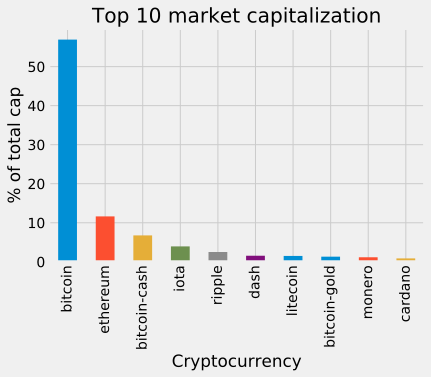

In [28]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'
TOP_CAP_XLABEL = 'Cryptocurrency'

# Selecting the first 10 rows and setting the index
cap10 = cap.head(10)
cap10=cap10.set_index(cap10['id'])

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd/cap.market_cap_usd.sum())*100)

# Plotting the barplot with the title defined above 
ax=cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE)

# Annotating the axis labels with the label defined above
ax.set_xlabel(TOP_CAP_XLABEL)
ax.set_ylabel(TOP_CAP_YLABEL)

## Making the plot easier to read and more informative
<p>While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log<sup>10</sup> scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative<sup>1</sup>. </p>
<p>For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a><sup>2</sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.</p>
<p><sup>1</sup> <em>This coloring is a simplification. There are more differences and similarities that are not being represented here.</em></p>
<p><sup>2</sup> <em>The bitcoin forks are actually <strong>very</strong> different, but it is out of scope to talk about them here.</em></p>

Text(0,0.5,'% of total cap')

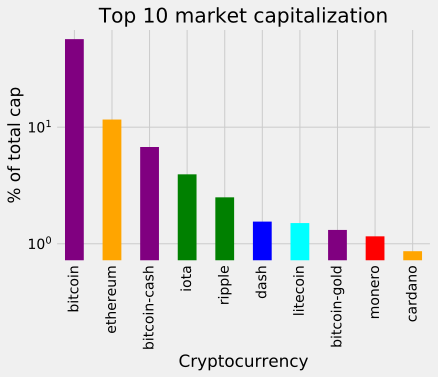

In [35]:
# Colors for the bar plot
COLORS = ['purple', 'orange', 'purple', 'green', 'green', 'blue', 'cyan', 'purple', 'red', 'orange']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = cap10.market_cap_perc.plot.bar(title="Top 10 market capitalization",color=COLORS)
ax.set_yscale('log')

# Annotating the y axis with 'USD'

ax.set_xlabel(TOP_CAP_XLABEL)
ax.set_ylabel(TOP_CAP_YLABEL)


## Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This project started with a big, bold warning for the same reason.</p>
<p>Here, we explore this volatility a bit more. We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

In [37]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id','percent_change_24h','percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility=volatility.set_index("id")
volatility = volatility.dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

# Checking the first few rows
display(HTML(volatility.head().to_html()))

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


<p>It is evident from the above data that one can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

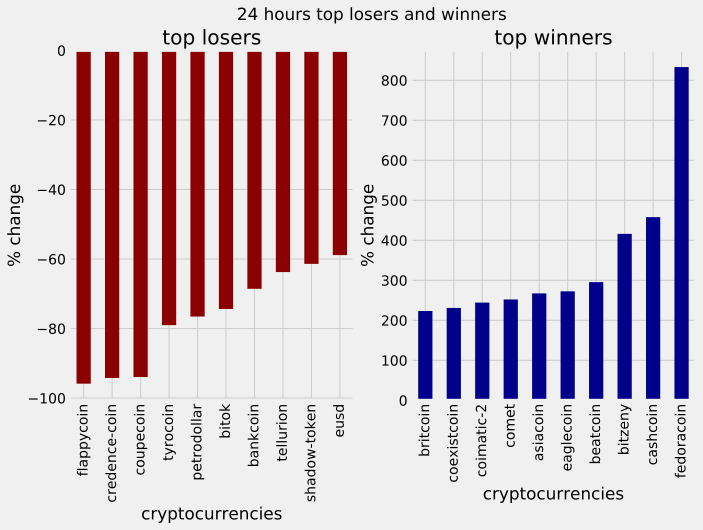

In [39]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers
    ax = volatility_series[:10].plot.bar(title="top losers", color = 'darkred',ax=axes[0])
    
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    
    # Setting the xlabel to 'cryptocurrencies' and ylabel to '% change'
    ax.set_xlabel("cryptocurrencies")
    ax.set_ylabel("% change")
    
    # Same as above, but for the top 10 winners
    ax = volatility_series[-10:].plot.bar(title="top winners", color = 'darkblue',ax=axes[1])

    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    
     # Setting the xlabel to 'cryptocurrencies' and ylabel to '% change'
    ax.set_xlabel("cryptocurrencies")
    ax.set_ylabel("% change")

    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility.percent_change_24h,DTITLE)

## Checking the weekly Statistics.
<p>*800% daily increase?! Why am I doing this project and not buying random coins?*</p>
<p>After calming down, let's reuse the function defined above to see what is going weekly instead of daily. Take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time</p>

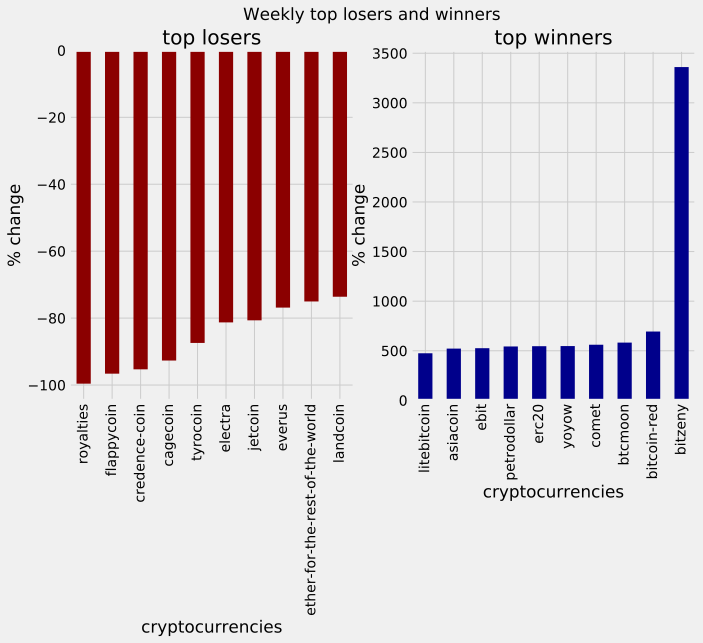

In [40]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d')

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d,WTITLE)

## Cryptocurrency Classification
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones. Let's classify our dataset based on Investopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks. </p>
<p><sup>1</sup> <em>Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em></p>

In [42]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query('market_cap_usd>10000000000')

# Printing out largecaps
display(HTML(largecaps.to_html()))

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.</p>

<p>Here, we define 3 categories of classification: <strong>*Big, Micro and Nano.*</strong><br>
    A cryptocurrency with market cap <b>more than 300 Million USD</b> will be termed as <b>Big.</b><br/>
    A cryptocurrency with market cap <b>between 50 Million USD and 300 Million USD</b> will be termed as <b>Micro.</b><br/>
    A cryptocurrency with market cap <b>below 50 Million USD</b> will be termed as <b>Nano.</b></p>

[39, 96, 896]


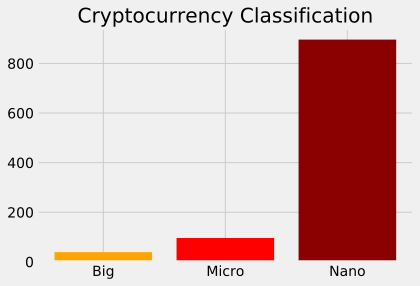

In [69]:
# Making a function for counting different marketcaps from the "cap" DataFrame. Returns an int.
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["Big", "Micro", "Nano"]

# Using capcount count the "big" cryptos
biggish = capcount('market_cap_usd>300000000')

# Same as above for "micro"
micro = capcount('market_cap_usd<300000000 & market_cap_usd>50000000')

# ... and for "nano"
nano =  capcount('market_cap_usd<50000000')

# Making a list with the 3 counts
values = [biggish,micro,nano]

# Plotting them with matplotlib

plt.bar([0,1,2], values, tick_label = LABELS, color=['orange','red','darkred'])
plt.title("Cryptocurrency Classification")
plt.show()

<p> The graph above shows the number of cryptocurrencies in 'Nano' category are far more than the ones in 'micro' and 'big' combined.</p>
<p> This was the sole motive of this project- to visualise the current market scenario of various cryptocurrencies in market.
    I hope to keep updating this project with deeper insights into this cryptocurrency data, combining with my knowledge of statistics and python. </p>
    
<hr>
###### This project is maintained by Aviral Sharma. <br>
You are free to use this code for further analysis. I recommend creating a coinmarketcap account to use your own API key for data mining. Any suggestions and code changes are welcome.
<br>
<p> This project is available as a repository on my <a href="https://github.com/aviral36/DataScience_Projects">DataScience Projects Repository</a> on GitHub.
    For further details, you can email me on my [Gmail](mailto:aviralvmc@gmail.com).<br/>
    Or, reach out to me on <a href="https://www.linkedin.com/in/aviralsharma1/1">LinkedIn</a>.</p>